In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
# uploading dataset
Gold_DF = pd.read_csv('gld_price_data.csv',date_parser='Date')
data = Gold_DF.copy()
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
column = ['Date','SPX/Stocks','Gold','US_Oil','Silver','EUR/USD']
data.columns = column

In [4]:
# data analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2290 non-null   object 
 1   SPX/Stocks  2290 non-null   float64
 2   Gold        2290 non-null   float64
 3   US_Oil      2290 non-null   float64
 4   Silver      2290 non-null   float64
 5   EUR/USD     2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
data['Day'] = data['Date'].apply(lambda x:str(x).split('/')[1])
data['Month'] = data['Date'].apply(lambda x:str(x).split('/')[0])
data['Year'] = data['Date'].apply(lambda x:str(x).split('/')[2])

In [6]:
data.head()

,Date,SPX/Stocks,Gold,US_Oil,Silver,EUR/USD,Day,Month,Year
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692,2,1,2008
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491,3,1,2008
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492,4,1,2008
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299,7,1,2008
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099,8,1,2008


In [7]:
num_months = list(data['Month'].unique())
name_months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [8]:
data['Month'] = data['Month'].replace(to_replace=num_months,value=name_months)

In [9]:
data.head()

,Date,SPX/Stocks,Gold,US_Oil,Silver,EUR/USD,Day,Month,Year
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692,2,Jan,2008
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491,3,Jan,2008
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492,4,Jan,2008
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299,7,Jan,2008
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099,8,Jan,2008


# Exploratory data analysis

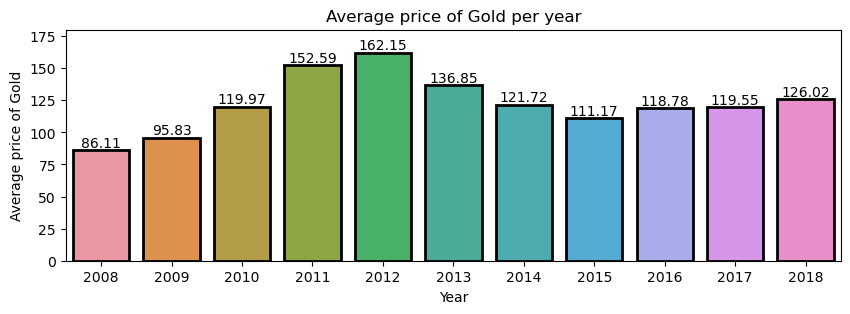

In [10]:
y = round(data.groupby('Year')['Gold'].mean(),2)
x = data.groupby('Year')['Gold'].mean().keys()
fig,ax = plt.subplots(figsize=(10,3))
Plot = sns.barplot(x,y,ec='k',lw=2,ax=ax)
ax.bar_label(ax.containers[0])
plt.xlabel('Year')
plt.ylabel('Average price of Gold')
plt.title('Average price of Gold per year')
plt.ylim(0,180)
plt.show()

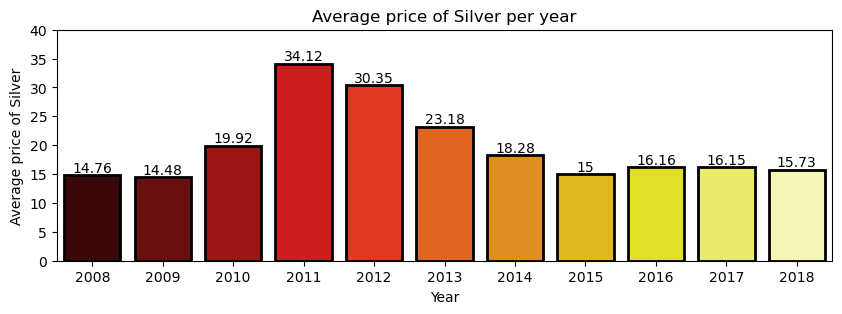

In [11]:
y = round(data.groupby('Year')['Silver'].mean(),2)
x = data.groupby('Year')['Silver'].mean().keys()
fig,ax = plt.subplots(figsize=(10,3))
Plot = sns.barplot(x,y,ec='k',lw=2,ax=ax,palette='hot')
ax.bar_label(ax.containers[0])
plt.xlabel('Year')
plt.ylabel('Average price of Silver')
plt.title('Average price of Silver per year')
plt.ylim(0,40)
plt.show()

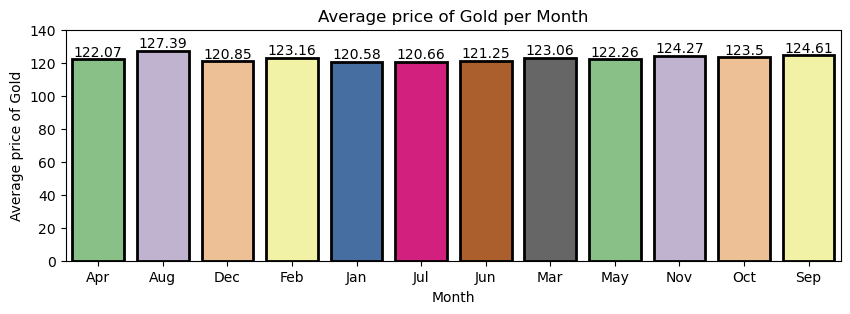

In [12]:
y = round(data.groupby('Month')['Gold'].mean(),2)
x = data.groupby('Month')['Gold'].mean().keys()
fig,ax = plt.subplots(figsize=(10,3))
Plot = sns.barplot(x,y,ec='k',lw=2,ax=ax,palette='Accent')
ax.bar_label(ax.containers[0])
plt.xlabel('Month')
plt.ylabel('Average price of Gold')
plt.title('Average price of Gold per Month')
plt.ylim(0,140)
plt.show()

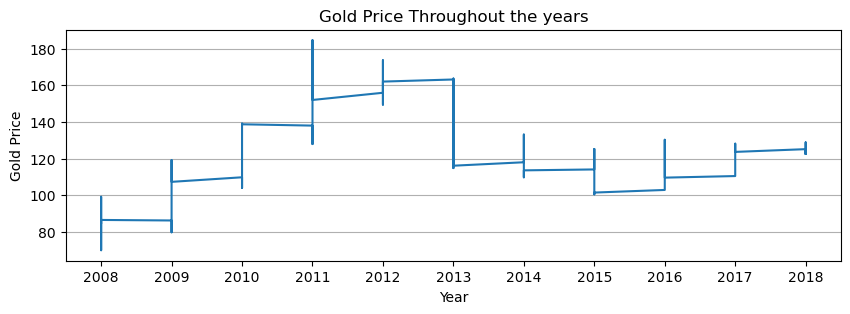

In [13]:
plt.figure(figsize=(10,3))
x = data['Year']
y = data['Gold']
plt.grid(axis='y')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.title('Gold Price Throughout the years')
plt.plot(x,y)
plt.show()

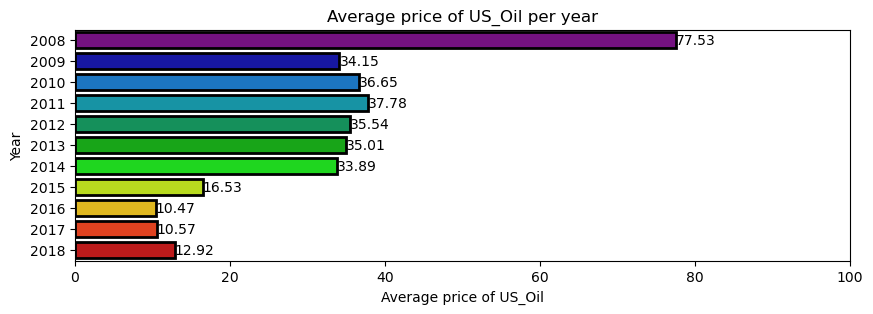

In [14]:
y = round(data.groupby('Year')['US_Oil'].mean(),2)
x = data.groupby('Year')['US_Oil'].mean().keys()
fig,ax = plt.subplots(figsize=(10,3))
Plot = sns.barplot(y,x,ec='k',lw=2,ax=ax,palette='nipy_spectral',orient='h')
ax.bar_label(ax.containers[0])
plt.ylabel('Year')
plt.xlabel('Average price of US_Oil')
plt.title('Average price of US_Oil per year')
plt.xlim(0,100)
plt.show()

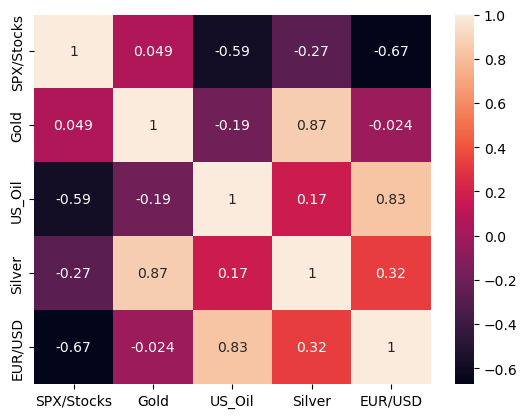

In [15]:
correlation = data.corr()
sns.heatmap(correlation,annot=True)
plt.show()

In [16]:
print('Correlation of Gold with other values:')
print('-')
print(correlation['Gold'].to_string())
print('-'*20)
print('Noted Silver and Gold has strong Positive correlation of 86%')

Correlation of Gold with other values:
-
SPX/Stocks    0.049345
Gold          1.000000
US_Oil       -0.186360
Silver        0.866632
EUR/USD      -0.024375
--------------------
Noted Silver and Gold has strong Positive correlation of 86%


In [17]:
Gold_DF.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [18]:
# Spliting feature and target variables
X = Gold_DF.drop(columns=['Date','GLD'],axis=1)
Y = Gold_DF.GLD

In [19]:
# Splitting features and target variables to train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=1,test_size=.25)

In [20]:
RFR=RandomForestRegressor(random_state=1)
Parameter={'n_estimators':[10,50,100,300],'max_depth':[3,5,10,15]}
grid=zip([RFR],[Parameter])

best_=None

for i, j in grid:
    a=GridSearchCV(i,param_grid=j,cv=3,n_jobs=1)
    a.fit(x_train,y_train)
    if best_ is None:
        best_=a
    elif a.best_score_>best_.best_score_:
        best_=a
        
        
print ("Best CV Score",best_.best_score_)
print ("Best Model Parameter",best_.best_params_)

Best CV Score 0.9862123622477501
Best Model Parameter {'max_depth': 15, 'n_estimators': 100}


In [21]:
RFR=RandomForestRegressor(n_estimators=300,max_depth=15,random_state=1)
RFR_Model = RFR.fit(x_train,y_train)
train_pred = RFR_Model.predict(x_train)

In [22]:
print('R2 Score on train data')
print(f'{round(r2_score(y_train,train_pred)*100,2)}%')

R2 Score on train data
99.85%


In [23]:
test_pred = RFR_Model.predict(x_test)
print('R2 Score on test data')
print(f'{round(r2_score(y_test,test_pred)*100,2)}%')

R2 Score on test data
98.76%


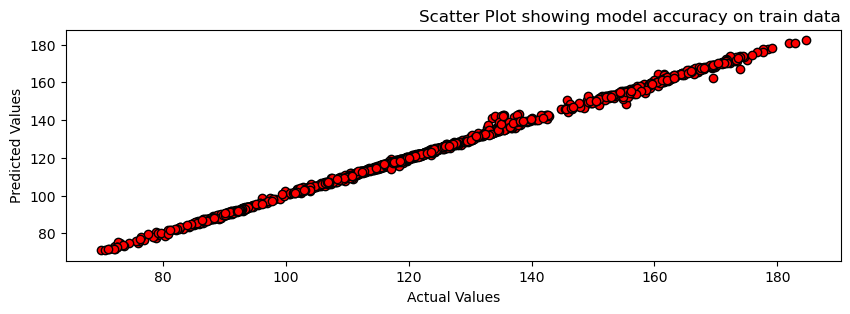

In [24]:
x = y_train
y = train_pred
plt.figure(figsize=(10,3))
plt.scatter(x,y,color='r',ec='k',lw=1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot showing model accuracy on train data',loc='right')
plt.show()

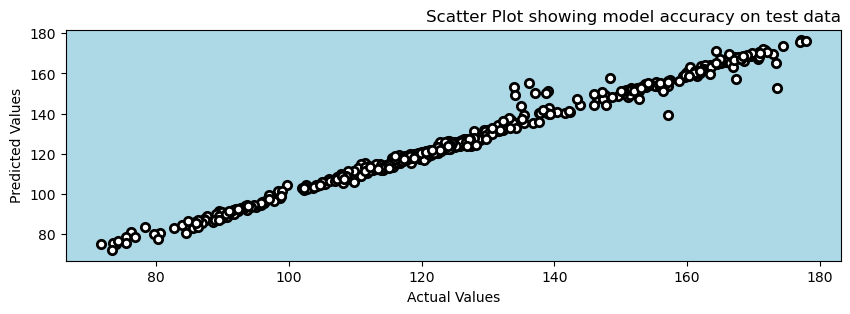

In [25]:
x = y_test
y = test_pred
plt.figure(figsize=(10,3))
ax = plt.axes()
ax.set_facecolor('lightblue')
plt.scatter(x,y,color='w',ec='k',lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot showing model accuracy on test data',loc='right')
plt.show()